## Logistic Regression
#### - Binary, Multinominal, Ordinal
#### - Sigmoid function
#### - Decision boundary: linear or non-linear. Polynomial order can be increased to get complex decision boundary.

#### Why cost function which has been used for linear can not be used for logistic?

#### Linear regression uses mean squared error as its cost function. If this is used for logistic regression, then it will be a non-convex function of parameters (theta). Gradient descent will converge into global minimum only if the function is convex.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import Data

In [3]:
data = pd.read_csv('ex2data1.txt', names = ['Exam1', 'Exam2', 'Accepted'])
data.head()

,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


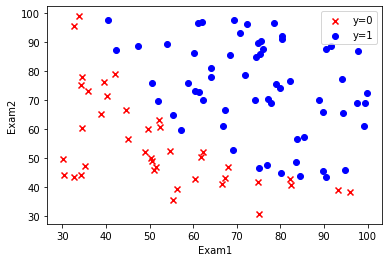

In [6]:
fig, ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam1'], data[data['Accepted']==0]['Exam2'], c='r', marker='x', label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'], data[data['Accepted']==1]['Exam2'], c='b', marker='o', label='y=1')
ax.legend()

ax.set(xlabel='Exam1',
       ylabel='Exam2')
plt.show()

#### Implement Algorithm

In [8]:
def get_Xy(data):
    data.insert(0, 'ones', 1)
    X = data.iloc[:, :-1]
    y_ = data.iloc[:, -1]
    
    X = X.values
    y = y_.values.reshape((len(y_),1))
                          
    return X, y

In [9]:
X, y = get_Xy(data)

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [21]:
def lossFunction(X, y, theta):
    s = sigmoid(X @ theta)
    return -np.sum(y * np.log(s) + (1-y) * np.log(1-s))/len(X)

In [13]:
theta = np.zeros((X.shape[1], 1))
theta.shape

(3, 1)

In [18]:
# gradient desent algorithm
def gradientDescent(X, y, theta, alpha, iters, isPrint=False):
    m = len(X)
    loss = []
    
    for i in range(iters):
        s = sigmoid(X @ theta)
        theta = theta - (alpha/m) * X.T @ (s-y)
        current_loss = lossFunction(X, y, theta)
        loss.append(current_loss)
        
        if i%10000 == 0:
            if isPrint:
                print(current_loss)
        
    return theta, loss

In [19]:
alpha = 0.004
iters = 200000

In [24]:
theta_final, loss = gradientDescent(X, y, theta, alpha, iters)

In [25]:
theta_final

array([[-23.77518967],
       [  0.18691354],
       [  0.18047183]])

In [33]:
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in prob]

In [35]:
# prediction accuracy
y_pred = np.array(predict(X, theta_final))
y_pred = y_pred.reshape(len(y_pred), 1)

acc = np.mean(y_pred == y)
print(acc)

0.86


#### Decision Boundary

In [26]:
# plot boundary theta0 + theta1 * x1 + theta2 * x2 = 0
coef1 = -theta_final[0,0] / theta_final[2,0]
coef2 = -theta_final[1,0] / theta_final[2,0]

In [28]:
x = np.linspace(20,100,100)
f = coef1 + coef2 * x

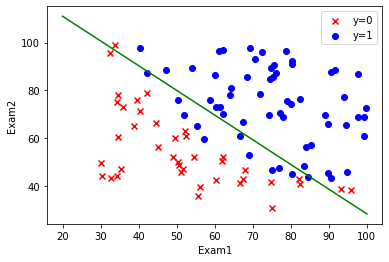

In [29]:
fig, ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam1'], data[data['Accepted']==0]['Exam2'], c='r', marker='x', label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'], data[data['Accepted']==1]['Exam2'], c='b', marker='o', label='y=1')
ax.plot(x, f, c='g')
ax.legend()

ax.set(xlabel='Exam1',
       ylabel='Exam2')
plt.show()